Dataset from https://www.kaggle.com/datasets/aibuzz/predict-the-genetic-disorders-datasetof-genomes

In [65]:
# import libraries
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
sns.set_style('darkgrid')

In [2]:
#load the data into a dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#inspect the dimensons
print('There are {} rows and {} columns for training.'.format(train_df.shape[0], train_df.shape[1]))
print('There are {} rows and {} columns for testing.'.format(test_df.shape[0], test_df.shape[1]))

There are 22083 rows and 45 columns for training.
There are 9465 rows and 43 columns for testing.


In [3]:
pd.options.display.max_rows = 4000

In [4]:
train_df.head(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [5]:
# get types for each variable
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [6]:
#get rid of stuff like id and names
train_df = train_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Test 1",
                    "Test 2",
                    "Test 3",
                    "Test 4",
                    "Test 5",
                    "Follow-up", 
                    "Gender", 
                    "Birth asphyxia", 
                    "Autopsy shows birth defect (if applicable)",
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "H/O radiation exposure (x-ray)", 
                    "H/O substance abuse", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5", 
                    "Genetic Disorder", 
                    "Disorder Subclass"]]

train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,0.0,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,0.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,0.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,Deceased,NaN,Normal,0.0,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,Alive,Normal (30-60),NaN,NaN,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,Alive,Tachypnea,Normal,0.0,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,0.0,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [7]:
# get types for each variable
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Status                                            22083 non-null  object 
 7   Respiratory Rate (breaths/min)                    19934 non-null  object 
 8   Heart Rate (rates/min                             19970 non-null  object 
 9   Test 1           

In [8]:
# Remove rows missing both targets
train_df = train_df[(train_df["Genetic Disorder"].isnull() != True) & (train_df["Disorder Subclass"].isnull() != True)]

In [9]:
#Check VendorID for invalid values
for col in train_df.columns:
    print(train_df[col].value_counts(dropna=False))
    print()
    
# get rid of all the tests and autopsy info

4.0     1170
5.0     1168
9.0     1166
12.0    1156
2.0     1152
0.0     1152
3.0     1140
7.0     1133
6.0     1127
13.0    1125
1.0     1124
8.0     1109
14.0    1094
11.0    1089
10.0    1082
NaN     1060
Name: Patient Age, dtype: int64

Yes    10743
No      7304
Name: Genes in mother's side, dtype: int64

No     10773
Yes     7054
NaN      220
Name: Inherited from father, dtype: int64

Yes    8803
No     7173
NaN    2071
Name: Maternal gene, dtype: int64

No     10239
Yes     7808
Name: Paternal gene, dtype: int64

4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: Blood cell count (mcL), Length: 18047, dtype: int64

Alive       9061
Deceased    8986
Name: Status, dtype: int64

Normal (30-60)    8281
Tachypnea         8196
NaN               1570
Name: Respiratory Rate (breaths/min), dtype: int64

Normal         8396
Tachycardia    8123
NaN            1528
Name: Heart Rate (r

In [10]:
train_df = train_df.replace('-', np.nan)

test_df = test_df.replace('-', np.nan)
test_df = test_df.replace('-99', np.nan)

In [11]:
#Check VendorID for invalid values
for col in train_df.columns:
    print(train_df[col].value_counts(dropna=False))
    print()

4.0     1170
5.0     1168
9.0     1166
12.0    1156
2.0     1152
0.0     1152
3.0     1140
7.0     1133
6.0     1127
13.0    1125
1.0     1124
8.0     1109
14.0    1094
11.0    1089
10.0    1082
NaN     1060
Name: Patient Age, dtype: int64

Yes    10743
No      7304
Name: Genes in mother's side, dtype: int64

No     10773
Yes     7054
NaN      220
Name: Inherited from father, dtype: int64

Yes    8803
No     7173
NaN    2071
Name: Maternal gene, dtype: int64

No     10239
Yes     7808
Name: Paternal gene, dtype: int64

4.760603    1
5.006081    1
5.014455    1
4.751267    1
4.506074    1
           ..
4.523190    1
4.693834    1
5.208621    1
4.838423    1
4.738067    1
Name: Blood cell count (mcL), Length: 18047, dtype: int64

Alive       9061
Deceased    8986
Name: Status, dtype: int64

Normal (30-60)    8281
Tachypnea         8196
NaN               1570
Name: Respiratory Rate (breaths/min), dtype: int64

Normal         8396
Tachycardia    8123
NaN            1528
Name: Heart Rate (r

In [12]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
print(percent_missing)

# get rid of H/O radiation exposure (x-ray) and H/O substance abuse and birth asphyxia

Patient Age                                          5.873552
Genes in mother's side                               0.000000
Inherited from father                                1.219039
Maternal gene                                       11.475592
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Status                                               0.000000
Respiratory Rate (breaths/min)                       8.699507
Heart Rate (rates/min                                8.466781
Test 1                                               8.716130
Test 2                                               8.799246
Test 3                                               8.693966
Test 4                                               8.721671
Test 5                                               8.843575
Follow-up                                            8.727212
Gender                                               8.716130
Birth as

In [13]:
train_df = train_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5", 
                    "Genetic Disorder", 
                    "Disorder Subclass"]]

test_df = test_df[["Patient Age", 
                    "Genes in mother's side", 
                    "Inherited from father", 
                    "Maternal gene", 
                    "Paternal gene", 
                    "Blood cell count (mcL)",
                    "Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Folic acid details (peri-conceptional)", 
                    "H/O serious maternal illness", 
                    "Assisted conception IVF/ART", 
                    "History of anomalies in previous pregnancies", 
                    "No. of previous abortion", 
                    "Birth defects", 
                    "White Blood cell count (thousand per microliter)", 
                    "Blood test result", 
                    "Symptom 1", 
                    "Symptom 2", 
                    "Symptom 3", 
                    "Symptom 4", 
                    "Symptom 5"]]

train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,High,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,Low,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,High,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,Low,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,Deceased,NaN,Normal,Low,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,Alive,Normal (30-60),NaN,Low,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,Alive,Tachypnea,Normal,Low,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,Low,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,Low,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
10,6.0,Yes,No,NaN,No,4.750824,Deceased,Tachypnea,NaN,Low,...,Singular,5.957321,abnormal,1.0,NaN,0.0,0.0,NaN,Single-gene inheritance diseases,Hemochromatosis


In [14]:
train_df.isnull().sum(axis=1).sort_values(ascending = False) #count the frequency of missing values in each row (i.e. how many columns are empty)

5687     10
18594    10
18880     9
16313     9
2888      9
         ..
12911     0
12913     0
12915     0
12916     0
22082     0
Length: 18047, dtype: int64

In [15]:
#Handle missing data -- deletion
train_df = train_df[train_df.isnull().sum(axis=1) < 5] #delete rows with 1 or more missing variables (in each row)

train_df.isnull().sum(axis=1).sort_values(ascending = False) #count the frequency of missing values in each row (i.e. how many columns are empty)

14407    4
14785    4
19654    4
2462     4
2463     4
        ..
14964    0
7135     0
7137     0
7141     0
22082    0
Length: 16738, dtype: int64

In [16]:
# get types for each variable
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16738 entries, 2 to 22082
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       15951 non-null  float64
 1   Genes in mother's side                            16738 non-null  object 
 2   Inherited from father                             16578 non-null  object 
 3   Maternal gene                                     15150 non-null  object 
 4   Paternal gene                                     16738 non-null  object 
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Status                                            16738 non-null  object 
 7   Respiratory Rate (breaths/min)                    15545 non-null  object 
 8   Heart Rate (rates/min                             15578 non-null  object 
 9   Follow-up        

In [17]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in train_df.columns:
    imp.fit(train_df[[col]])
    train_df[[col]] = imp.transform(train_df[[col]])
print(train_df)

       Patient Age Genes in mother's side Inherited from father Maternal gene  \
2              6.0                    Yes                    No            No   
3             12.0                    Yes                    No           Yes   
4             11.0                    Yes                    No           Yes   
5             14.0                    Yes                    No           Yes   
6              3.0                    Yes                    No           Yes   
...            ...                    ...                   ...           ...   
22076          0.0                    Yes                    No           Yes   
22078          4.0                    Yes                   Yes           Yes   
22079          8.0                     No                   Yes            No   
22080          8.0                    Yes                    No           Yes   
22082         11.0                    Yes                    No            No   

      Paternal gene  Blood 

In [18]:
# get types for each variable
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16738 entries, 2 to 22082
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       16738 non-null  float64
 1   Genes in mother's side                            16738 non-null  object 
 2   Inherited from father                             16738 non-null  object 
 3   Maternal gene                                     16738 non-null  object 
 4   Paternal gene                                     16738 non-null  object 
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Status                                            16738 non-null  object 
 7   Respiratory Rate (breaths/min)                    16738 non-null  object 
 8   Heart Rate (rates/min                             16738 non-null  object 
 9   Follow-up        

In [19]:
train_df["Genes in mother's side"] = train_df["Genes in mother's side"].map(dict(Yes=True, No=False))
train_df["Inherited from father"] = train_df["Inherited from father"].map(dict(Yes=True, No=False))
train_df["Maternal gene"] = train_df["Maternal gene"].map(dict(Yes=True, No=False))
train_df["Paternal gene"] = train_df["Paternal gene"].map(dict(Yes=True, No=False))
train_df["Folic acid details (peri-conceptional)"] = train_df["Folic acid details (peri-conceptional)"].map(dict(Yes=True, No=False))
train_df["H/O serious maternal illness"] = train_df["H/O serious maternal illness"].map(dict(Yes=True, No=False))
train_df["Assisted conception IVF/ART"] = train_df["Assisted conception IVF/ART"].map(dict(Yes=True, No=False))
train_df["History of anomalies in previous pregnancies"] = train_df["History of anomalies in previous pregnancies"].map(dict(Yes=True, No=False))


test_df["Genes in mother's side"] = test_df["Genes in mother's side"].map(dict(Yes=True, No=False))
test_df["Inherited from father"] = test_df["Inherited from father"].map(dict(Yes=True, No=False))
test_df["Maternal gene"] = test_df["Maternal gene"].map(dict(Yes=True, No=False))
test_df["Paternal gene"] = test_df["Paternal gene"].map(dict(Yes=True, No=False))
test_df["Folic acid details (peri-conceptional)"] = test_df["Folic acid details (peri-conceptional)"].map(dict(Yes=True, No=False))
test_df["H/O serious maternal illness"] = test_df["H/O serious maternal illness"].map(dict(Yes=True, No=False))
test_df["Assisted conception IVF/ART"] = test_df["Assisted conception IVF/ART"].map(dict(Yes=True, No=False))
test_df["History of anomalies in previous pregnancies"] = test_df["History of anomalies in previous pregnancies"].map(dict(Yes=True, No=False))

In [20]:
train_df["Patient Age"]  = train_df["Patient Age"].astype('int64')
train_df["Genes in mother's side"]  = train_df["Genes in mother's side"].astype('boolean')
train_df["Inherited from father"]  = train_df["Inherited from father"].astype('boolean')
train_df["Maternal gene"]  = train_df["Maternal gene"].astype('boolean')
train_df["Paternal gene"]  = train_df["Paternal gene"].astype('boolean')
train_df["Folic acid details (peri-conceptional)"]  = train_df["Folic acid details (peri-conceptional)"].astype('boolean')
train_df["H/O serious maternal illness"]  = train_df["H/O serious maternal illness"].astype('boolean')
train_df["Assisted conception IVF/ART"]  = train_df["Assisted conception IVF/ART"].astype('boolean')
train_df["History of anomalies in previous pregnancies"]  = train_df["History of anomalies in previous pregnancies"].astype('boolean')
train_df["No. of previous abortion"]  = train_df["No. of previous abortion"].astype('int64')
train_df["Symptom 1"]  = train_df["Symptom 1"].astype('boolean')
train_df["Symptom 2"]  = train_df["Symptom 2"].astype('boolean')
train_df["Symptom 3"]  = train_df["Symptom 3"].astype('boolean')
train_df["Symptom 4"]  = train_df["Symptom 4"].astype('boolean')
train_df["Symptom 5"]  = train_df["Symptom 5"].astype('boolean')

train_df = pd.get_dummies(train_df, columns=["Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Birth defects",
                    "Blood test result"])
                    # "Genetic Disorder", 
                    # "Disorder Subclass"])

test_df["Genes in mother's side"]  = test_df["Genes in mother's side"].astype('boolean')
test_df["Inherited from father"]  = test_df["Inherited from father"].astype('boolean')
test_df["Maternal gene"]  = test_df["Maternal gene"].astype('boolean')
test_df["Paternal gene"]  = test_df["Paternal gene"].astype('boolean')
test_df["Folic acid details (peri-conceptional)"]  = test_df["Folic acid details (peri-conceptional)"].astype('boolean')
test_df["H/O serious maternal illness"]  = test_df["H/O serious maternal illness"].astype('boolean')
test_df["Assisted conception IVF/ART"]  = test_df["Assisted conception IVF/ART"].astype('boolean')
test_df["History of anomalies in previous pregnancies"]  = test_df["History of anomalies in previous pregnancies"].astype('boolean')
test_df["Symptom 1"]  = test_df["Symptom 1"].astype('boolean')
test_df["Symptom 2"]  = test_df["Symptom 2"].astype('boolean')
test_df["Symptom 3"]  = test_df["Symptom 3"].astype('boolean')
test_df["Symptom 4"]  = test_df["Symptom 4"].astype('boolean')
test_df["Symptom 5"]  = test_df["Symptom 5"].astype('boolean')

test_df = pd.get_dummies(test_df, columns=["Status", 
                    "Respiratory Rate (breaths/min)", 
                    "Heart Rate (rates/min", 
                    "Follow-up", 
                    "Gender", 
                    "Birth defects",
                    "Blood test result"])


# get types for each variable
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16738 entries, 2 to 22082
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       16738 non-null  int64  
 1   Genes in mother's side                            16738 non-null  boolean
 2   Inherited from father                             16738 non-null  boolean
 3   Maternal gene                                     16738 non-null  boolean
 4   Paternal gene                                     16738 non-null  boolean
 5   Blood cell count (mcL)                            16738 non-null  float64
 6   Folic acid details (peri-conceptional)            16738 non-null  boolean
 7   H/O serious maternal illness                      16738 non-null  boolean
 8   Assisted conception IVF/ART                       16738 non-null  boolean
 9   History of anomal

In [21]:
# get types for each variable
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       9465 non-null   int64  
 1   Genes in mother's side                            9465 non-null   boolean
 2   Inherited from father                             8914 non-null   boolean
 3   Maternal gene                                     5742 non-null   boolean
 4   Paternal gene                                     9465 non-null   boolean
 5   Blood cell count (mcL)                            9465 non-null   float64
 6   Folic acid details (peri-conceptional)            7373 non-null   boolean
 7   H/O serious maternal illness                      7385 non-null   boolean
 8   Assisted conception IVF/ART                       7380 non-null   boolean
 9   History of anomalie

In [22]:
train_df.head(10)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Folic acid details (peri-conceptional),H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,...,Follow-up_Low,Gender_Ambiguous,Gender_Female,Gender_Male,Birth defects_Multiple,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
2,6,True,False,False,False,4.893297,True,False,True,True,...,1,0,0,1,0,1,0,0,1,0
3,12,True,False,True,False,4.705280,False,True,True,True,...,0,0,0,1,0,1,0,1,0,0
4,11,True,False,True,True,4.720703,False,True,True,False,...,1,0,0,1,1,0,0,0,0,1
5,14,True,False,True,False,5.103188,False,False,True,False,...,1,0,1,0,1,0,0,0,1,0
6,3,True,False,True,True,4.901080,True,True,True,False,...,1,0,0,1,1,0,0,0,1,0
7,3,False,False,True,True,4.964816,True,True,False,True,...,1,0,0,1,0,1,0,1,0,0
8,11,False,False,True,False,5.209058,True,True,False,True,...,1,0,0,1,1,0,0,0,0,1
9,4,False,True,True,True,4.752272,True,False,True,True,...,1,0,0,1,1,0,1,0,0,0
11,7,False,False,False,True,4.848795,True,True,False,True,...,1,0,0,1,1,0,0,0,0,1
12,1,True,True,False,False,4.612265,True,False,True,True,...,0,0,0,1,0,1,0,0,0,1


In [23]:
for col in train_df.columns:
    print('"' + col + '",')

"Patient Age",
"Genes in mother's side",
"Inherited from father",
"Maternal gene",
"Paternal gene",
"Blood cell count (mcL)",
"Folic acid details (peri-conceptional)",
"H/O serious maternal illness",
"Assisted conception IVF/ART",
"History of anomalies in previous pregnancies",
"No. of previous abortion",
"White Blood cell count (thousand per microliter)",
"Symptom 1",
"Symptom 2",
"Symptom 3",
"Symptom 4",
"Symptom 5",
"Genetic Disorder",
"Disorder Subclass",
"Status_Alive",
"Status_Deceased",
"Respiratory Rate (breaths/min)_Normal (30-60)",
"Respiratory Rate (breaths/min)_Tachypnea",
"Heart Rate (rates/min_Normal",
"Heart Rate (rates/min_Tachycardia",
"Follow-up_High",
"Follow-up_Low",
"Gender_Ambiguous",
"Gender_Female",
"Gender_Male",
"Birth defects_Multiple",
"Birth defects_Singular",
"Blood test result_abnormal",
"Blood test result_inconclusive",
"Blood test result_normal",
"Blood test result_slightly abnormal",


In [24]:
train_x_df = train_df[["Patient Age",
                        "Genes in mother's side",
                        "Inherited from father",
                        "Maternal gene",
                        "Paternal gene",
                        "Blood cell count (mcL)",
                        "Folic acid details (peri-conceptional)",
                        "H/O serious maternal illness",
                        "Assisted conception IVF/ART",
                        "History of anomalies in previous pregnancies",
                        "No. of previous abortion",
                        "White Blood cell count (thousand per microliter)",
                        "Symptom 1",
                        "Symptom 2",
                        "Symptom 3",
                        "Symptom 4",
                        "Symptom 5",
                        "Status_Alive",
                        "Status_Deceased",
                        "Respiratory Rate (breaths/min)_Normal (30-60)",
                        "Respiratory Rate (breaths/min)_Tachypnea",
                        "Heart Rate (rates/min_Normal",
                        "Heart Rate (rates/min_Tachycardia",
                        "Follow-up_High",
                        "Follow-up_Low",
                        "Gender_Ambiguous",
                        "Gender_Female",
                        "Gender_Male",
                        "Birth defects_Multiple",
                        "Birth defects_Singular",
                        "Blood test result_abnormal",
                        "Blood test result_inconclusive",
                        "Blood test result_normal",
                        "Blood test result_slightly abnormal"]]

train_y1_df = train_df[["Genetic Disorder"]]

train_y2_df = train_df[["Disorder Subclass"]]

enc1 = LabelEncoder()
enc1.fit_transform(train_y1_df)
train_y1_df = enc1.transform(train_y1_df).reshape(-1,1)

enc2 = LabelEncoder()
enc2.fit_transform(train_y2_df)
train_y2_df = enc2.transform(train_y2_df).reshape(-1,1)

test_x_df = test_df

c:\Users\Mary Poissant\anaconda3\envs\capstone\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary Poissant\anaconda3\envs\capstone\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
#inspect the dimensons
print('There are {} rows and {} columns for training.'.format(train_x_df.shape[0], train_x_df.shape[1]))
print('There are {} rows and {} columns for target 1.'.format(train_y1_df.shape[0], train_y1_df.shape[1]))
print('There are {} rows and {} columns for target 2.'.format(train_y2_df.shape[0], train_y2_df.shape[1]))
print('There are {} rows and {} columns for testing.'.format(test_x_df.shape[0], test_x_df.shape[1]))

There are 16738 rows and 34 columns for training.
There are 16738 rows and 1 columns for target 1.
There are 16738 rows and 1 columns for target 2.
There are 9465 rows and 34 columns for testing.


In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(train_x_df, train_y1_df, stratify = train_y1_df, test_size=0.33, random_state=7)
X2_train, X2_test, y2_train, y2_test = train_test_split(train_x_df, train_y2_df, stratify = train_y2_df, test_size=0.33, random_state=7)

In [27]:
genetic_disorder_score = {}
disorder_subclass_score = {}
total_score = {}

In [28]:
random1 = np.random.randint(3, size=X1_test.shape[0])
random2 = np.random.randint(9, size=X1_test.shape[0])

score1 = f1_score(y1_test, random1, average='macro')
score2 = f1_score(y2_test, random2, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Random"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Random"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Random"] = score

0.308
0.088
Score: 0.198


In [29]:
parameters = {'n_neighbors':[2, 3, 4, 5]}

neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)

clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

neigh = clf.best_estimator_
neigh.fit(X1_train, y1_train.ravel())

test1_pred_df = neigh.predict(X1_test)

KNeighborsClassifier(n_neighbors=2)
0.475387477663684


In [30]:
parameters = {'n_neighbors':[8, 9, 10, 11, 12, 13, 14]}

neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)

clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

neigh = clf.best_estimator_
neigh.fit(X2_train, y2_train.ravel())

test2_pred_df = neigh.predict(X2_test)

KNeighborsClassifier(n_neighbors=12)
0.26609712126496826


In [31]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["K Neighbors"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["K Neighbors"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["K Neighbors"] = score

0.335
0.144
Score: 0.24


In [32]:
parameters = {'gamma':[.01, .1, 1, 10], 'C':[.1, 1, 10, 100]}

svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

svm = clf.best_estimator_
svm.fit(X1_train, y1_train.ravel())


test1_pred_df = svm.predict(X1_test)

SVC(C=100, gamma=0.01)
0.5501155144978748


In [33]:
parameters = {'gamma':[.01, .1, 1, 10], 'C':[.1, 1, 10, 100]}

svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

svm = clf.best_estimator_
svm.fit(X2_train, y2_train.ravel())


test2_pred_df = svm.predict(X2_test)

SVC(C=10, gamma=0.01)
0.4028887970623643


In [34]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["SVC"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["SVC"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["SVC"] = score

0.454
0.234
Score: 0.344


In [35]:
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X1_train, y1_train)

print(clf.best_estimator_)
print(clf.best_score_)

dtc = clf.best_estimator_
dtc.fit(X1_train, y1_train)


test1_pred_df = dtc.predict(X1_test)

DecisionTreeClassifier(max_depth=6)
0.5956827922970185


In [36]:
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X2_train, y2_train)

print(clf.best_estimator_)
print(clf.best_score_)

dtc = clf.best_estimator_
dtc.fit(X2_train, y2_train)


test2_pred_df = dtc.predict(X2_test)

DecisionTreeClassifier(max_depth=7)
0.38514263624407064


In [37]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Decision Tree"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Decision Tree"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Decision Tree"] = score

0.487
0.263
Score: 0.375


In [38]:
parameters = {'n_estimators': [10, 25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 8, 11, 14]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rfc = clf.best_estimator_
rfc.fit(X1_train, y1_train.ravel())


test1_pred_df = rfc.predict(X1_test)

RandomForestClassifier(max_depth=8, max_features=None)
0.6062061252710882


In [39]:
parameters = {'n_estimators': [10, 25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 8, 11, 14]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rfc = clf.best_estimator_
rfc.fit(X2_train, y2_train.ravel())


test2_pred_df = rfc.predict(X2_test)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=150)
0.4005693598042955


In [40]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Random Forest"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Random Forest"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Random Forest"] = score

0.504
0.267
Score: 0.385


In [41]:
parameters = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [.01, .1, 1, 10],
    'learning_rate': ['constant','adaptive']
}

mlpc = MLPClassifier(max_iter=1000)
clf = GridSearchCV(mlpc, parameters)
clf.fit(X1_train, y1_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

mlpc = clf.best_estimator_
mlpc.fit(X1_train, y1_train.ravel())


test1_pred_df = mlpc.predict(X1_test)

MLPClassifier(activation='tanh', alpha=0.1, max_iter=1000, solver='sgd')
0.6214551128041129


In [42]:
parameters = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [.01, .1, 1, 10],
    'learning_rate': ['constant','adaptive']
}

mlpc = MLPClassifier(max_iter=1000)
clf = GridSearchCV(mlpc, parameters)
clf.fit(X2_train, y2_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

mlpc = clf.best_estimator_
mlpc.fit(X2_train, y2_train.ravel())


test2_pred_df = mlpc.predict(X2_test)

c:\Users\Mary Poissant\anaconda3\envs\capstone\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1, learning_rate='adaptive',
              max_iter=1000)
0.4233983971543146


In [43]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["MLP"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["MLP"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["MLP"] = score

0.502
0.242
Score: 0.372


In [44]:
gnbc = GaussianNB()
gnbc.fit(X1_train, y1_train.ravel())

test1_pred_df = gnbc.predict(X1_test)

c:\Users\Mary Poissant\anaconda3\envs\capstone\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
gnbc = GaussianNB()
gnbc.fit(X2_train, y2_train.ravel())

test2_pred_df = gnbc.predict(X2_test)

c:\Users\Mary Poissant\anaconda3\envs\capstone\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print(np.round(score1, 3))
genetic_disorder_score["Naive Bayes"] = np.round(score1, 3)
print(np.round(score2, 3))
disorder_subclass_score["Naive Bayes"] = np.round(score2, 3)

score = np.round((score1/2) + (score2/2), 3)
print("Score: " + str(score))
total_score["Naive Bayes"] = score

0.393
0.291
Score: 0.342


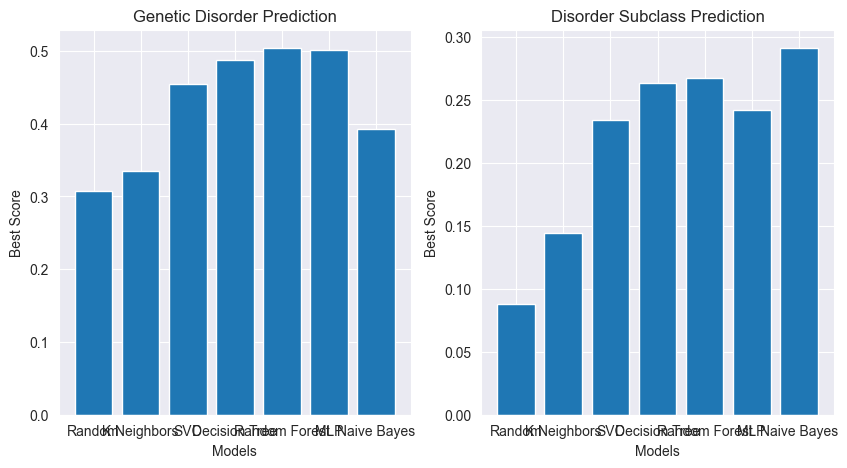

In [54]:
models1 = list(genetic_disorder_score.keys())
scores1 = list(genetic_disorder_score.values())

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.bar(models1, scores1)
plt.xlabel("Models")
plt.ylabel("Best Score")
plt.title("Genetic Disorder Prediction")

models2 = list(disorder_subclass_score.keys())
scores2 = list(disorder_subclass_score.values())

plt.subplot(1, 2, 2)
plt.bar(models2, scores2)
plt.xlabel("Models")
plt.ylabel("Best Score")
plt.title("Disorder Subclass Prediction")

plt.show()



In [64]:
model1 = max(genetic_disorder_score, key=genetic_disorder_score.get)
score1 = genetic_disorder_score[model1]
print("Best model for genetic disorder prediction: " + model1)
print("     Score: " + str(score1))

model2 = max(disorder_subclass_score, key=disorder_subclass_score.get)
score2 = disorder_subclass_score[model2]
print("Best model for disorder subclass prediction: " + model2)
print("     Score: " + str(score2))

total_model = max(total_score, key=total_score.get)
print("Best total model: " + total_model)
print("     Score: " + str(total_score[total_model]))

best_total_score = np.round((score1/2) + (score2/2), 3)
print()
print("Best possible score: " + str(best_total_score))

Best model for genetic disorder prediction: Random Forest
     Score: 0.504
Best model for disorder subclass prediction: Naive Bayes
     Score: 0.291
Best total model: Random Forest
     Score: 0.385

Best possible score: 0.397


In [66]:
rfc = RandomForestClassifier(max_depth=8, max_features=None)
rfc.fit(X1_train, y1_train.ravel())

test1_pred_df = rfc.predict(X1_test)

In [67]:
gnbc = GaussianNB()
gnbc.fit(X2_train, y2_train.ravel())

test2_pred_df = gnbc.predict(X2_test)

In [69]:
score1 = f1_score(y1_test, test1_pred_df, average='macro')
score2 = f1_score(y2_test, test2_pred_df, average='macro')

print("Best score for genetic disorder model prediction: " + str(np.round(score1, 3)))
print("Best score for disorder subclass model prediction: " + str(np.round(score2, 3)))

score = np.round((score1/2) + (score2/2), 3)
print("Best score: " + str(score))

Best score for genetic disorder model prediction: 0.506
Best score for disorder subclass model prediction: 0.291
Best score: 0.398


Confusion Matrix (rows: Predicted class, columns: True class):
[[2184  117  526]
 [ 124  161  288]
 [1093  105  926]]


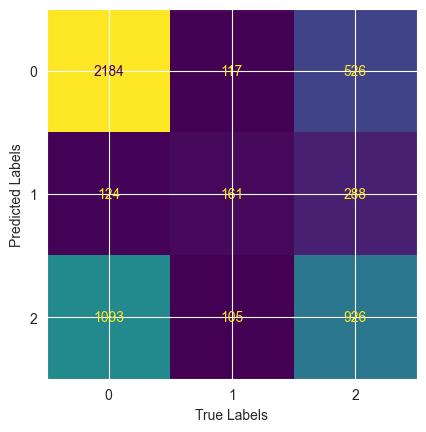

In [71]:
# Simply using sklearn confusion matrix
print("Confusion Matrix (rows: Predicted class, columns: True class):")
conf_mat = confusion_matrix(y_pred=test1_pred_df, y_true=y1_test)
print(conf_mat)

conf_display = ConfusionMatrixDisplay.from_predictions(y_pred=test1_pred_df, y_true=y1_test, colorbar=False)
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show() 

Confusion Matrix (rows: Predicted class, columns: True class):
[[ 10   0  11   2   0  15   2   0   0]
 [  0  11   0   0   4   0   0   1  11]
 [  8   0 425  64   0  13 406  51   2]
 [ 23   0 263  67   0  38 112   2   1]
 [  0  32   1   0  39   0  41 131 125]
 [ 20   0  84  31   0  35  11   0   0]
 [  0   5 131   6   5   1 887 345  51]
 [  0   6  22   2  18   2 601 432 132]
 [  0  11   2   0  27   0 224 325 197]]


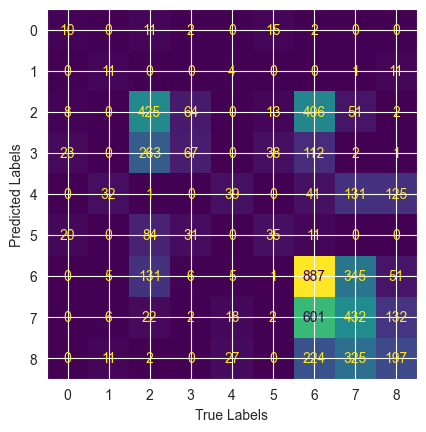

In [72]:
# Simply using sklearn confusion matrix
print("Confusion Matrix (rows: Predicted class, columns: True class):")
conf_mat = confusion_matrix(y_pred=test2_pred_df, y_true=y2_test)
print(conf_mat)

conf_display = ConfusionMatrixDisplay.from_predictions(y_pred=test2_pred_df, y_true=y2_test, colorbar=False)
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show() 